In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [3]:
house_data=pd.read_csv(r'C:\Users\tt172\Pictures\house-prices-advanced-regression-techniques\train.csv')
house_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [126]:
house_data.shape

(1460, 81)

In [127]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
duplicates=house_data[house_data.duplicated()]
duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [130]:
null_value_percentage=house_data.isnull().sum()*100/len(house_data)
print(round(null_value_percentage,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [6]:
#Exploration of the data shows that the null value represents element or products absent in the bulding
#hence all null value will be replaced with None
replace_cat_with_none=['Alley', 'MasVnrType', 'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
                       'Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual',
                       'GarageCond','PoolQC','Fence','MiscFeature']

for col in replace_cat_with_none:
    house_data[col]= house_data[col].fillna('None')

In [7]:
house_data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [8]:
house_data['BsmtExposure']=house_data['BsmtExposure'].fillna('No')

In [9]:
replace_num_with_0=['GarageYrBlt','MasVnrArea']

for ncol in replace_num_with_0:
    house_data[ncol]= house_data[ncol].fillna(0)

In [10]:
house_data['LotFrontage']= house_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:
                                                                                       x.fillna(x.median()))

In [11]:
house_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [12]:
house_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
870,871,20,RL,60.0,6600,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,Gd,N,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1962.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,8,2009,WD,Normal,109500
828,829,60,RL,80.0,28698,Pave,None,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story,5,5,1967,1967,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,Gd,Gd,LwQ,249,ALQ,764,0,1013,GasA,TA,Y,SBrkr,1160,966,0,2126,0,1,2,1,3,1,TA,7,Min2,0,None,Attchd,1967.0,Fin,2,538,TA,TA,Y,486,0,0,0,225,0,None,None,None,0,6,2009,WD,Abnorml,185000
472,473,180,RM,35.0,3675,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,459,Unf,0,88,547,GasA,Ex,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,None,Basment,2005.0,RFn,2,525,TA,TA,Y,0,28,0,0,0,0,None,None,None,0,6,2008,WD,Normal,148000
521,522,20,RL,90.0,11988,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,1Story,6,6,1957,1957,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,777,Unf,0,467,1244,GasA,Ex,Y,FuseA,1244,0,0,1244,0,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1957.0,Unf,1,336,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,5,2007,WD,Normal,150000
77,78,50,RM,50.0,8635,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,5,1948,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,336,GLQ,41,295,672,GasA,TA,Y,SBrkr,1072,213,0,1285,1,0,1,0,2,1,TA,6,Min1,0,None,Detchd,1948.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,1,2008,WD,Normal,127000


In [13]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,70.199658,22.431902,21.0,60.00,70.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [324]:
house_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
932,933,20,RL,84.0,11670,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,Ex,Y,SBrkr,1905,0,0,1905,0,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2006.0,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,None,None,None,0,3,2007,WD,Normal,320000
518,519,60,RL,70.0,9531,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,706,Unf,0,88,794,GasA,Ex,Y,SBrkr,882,914,0,1796,1,0,2,1,3,1,TA,7,Typ,0,None,Attchd,1998.0,RFn,2,546,TA,TA,Y,0,36,0,0,0,0,None,MnPrv,None,0,5,2007,WD,Normal,211000
1146,1147,20,RL,66.5,11200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,1985,1985,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,85.0,Gd,TA,CBlock,Gd,TA,No,GLQ,1258,Unf,0,40,1298,GasA,TA,Y,SBrkr,1298,0,0,1298,1,0,2,0,3,1,Gd,5,Typ,1,TA,Attchd,1985.0,Unf,2,403,TA,TA,Y,165,26,0,0,0,0,None,None,None,0,5,2006,WD,Normal,180000
396,397,20,RL,60.0,7200,Pave,None,Reg,Low,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1972,1972,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Av,Rec,777,Unf,0,117,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,None,Detchd,1985.0,RFn,2,600,TA,TA,Y,215,0,0,0,0,0,None,None,None,0,9,2009,WD,Normal,123000
996,997,20,RL,73.0,10659,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1961,1961,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,915,Unf,0,135,1050,GasA,TA,Y,SBrkr,1050,0,0,1050,1,0,1,0,3,1,TA,6,Typ,0,None,Attchd,1961.0,Unf,1,368,TA,TA,Y,0,319,0,0,0,0,None,None,None,0,1,2006,COD,Normal,136500


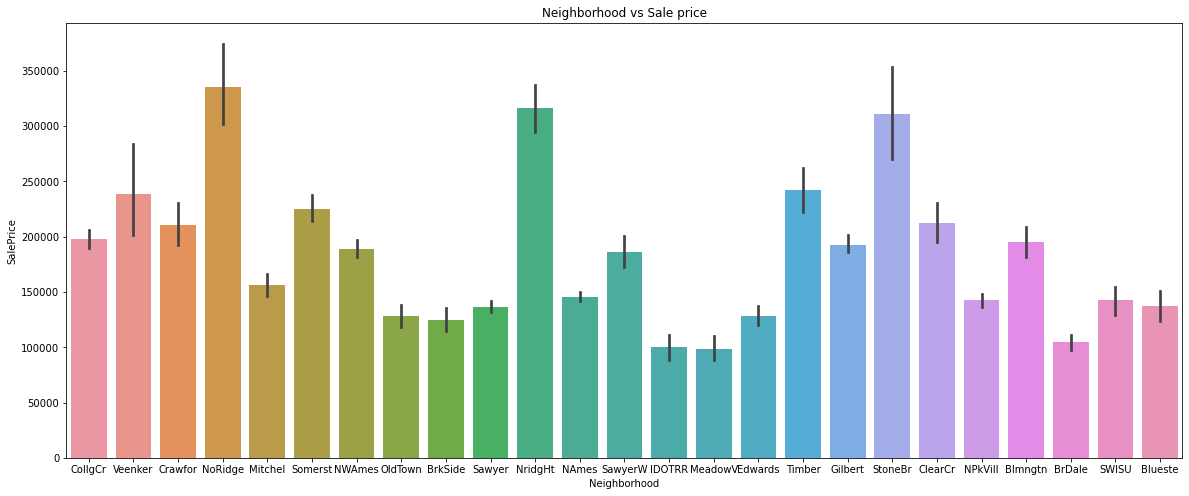

In [225]:
plt.figure(figsize=(20,8))
sns.barplot(x='Neighborhood',y='SalePrice', data=house_data)
plt.title('Neighborhood vs Sale price');

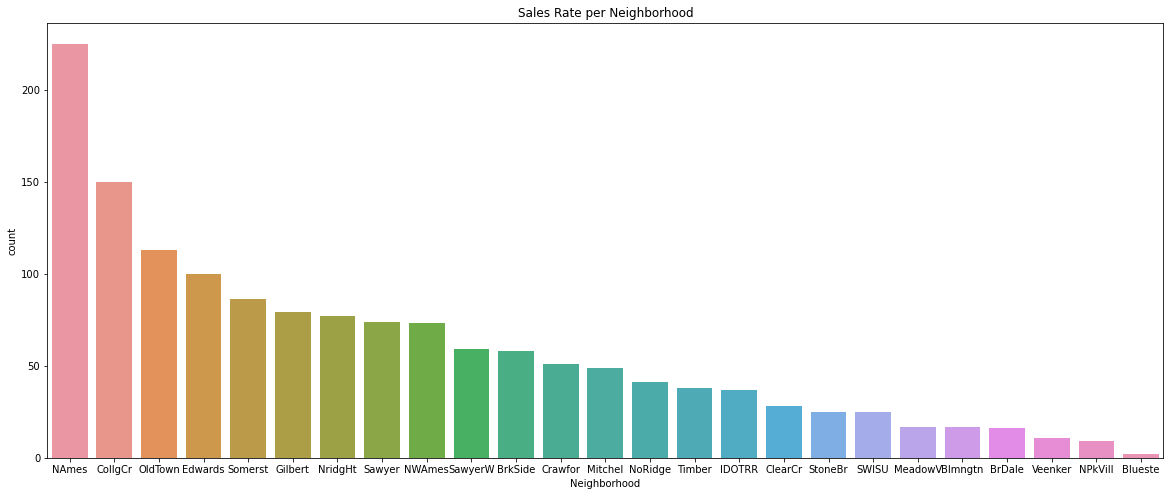

In [223]:
plt.figure(figsize=(20,8))
sns.countplot(x='Neighborhood', data=house_data,order=house_data['Neighborhood']. value_counts().index)
plt.title('Sales Rate per Neighborhood');

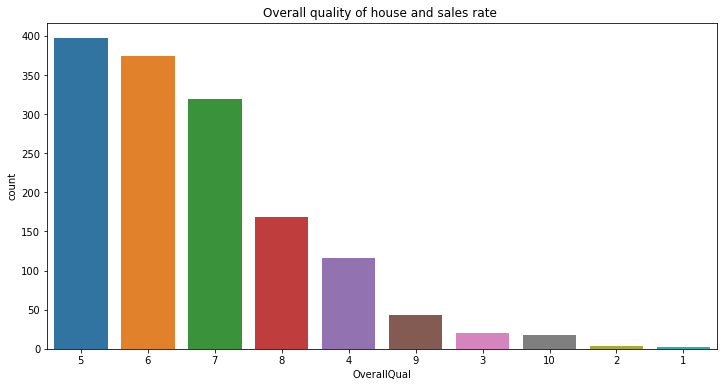

In [222]:
plt.figure(figsize=(12,6))
sns.countplot(x='OverallQual', data=house_data,order=house_data['OverallQual']. value_counts().index)
plt.title('Overall quality of house and sales rate ');

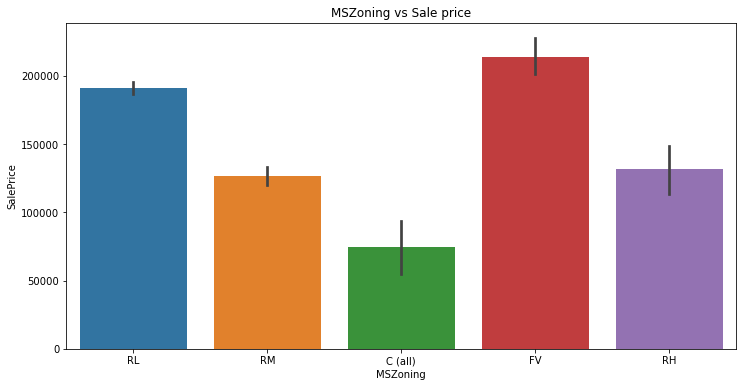

In [227]:
plt.figure(figsize=(12,6))
sns.barplot(x='MSZoning',y='SalePrice', data=house_data)
plt.title('MSZoning vs Sale price');

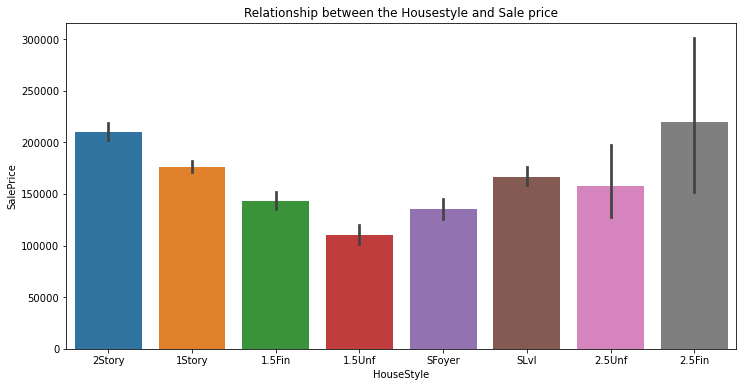

In [202]:
plt.figure(figsize=(12,6))
sns.barplot(x='HouseStyle',y='SalePrice', data=house_data)
plt.title('Relationship between the Housestyle and Sale price');

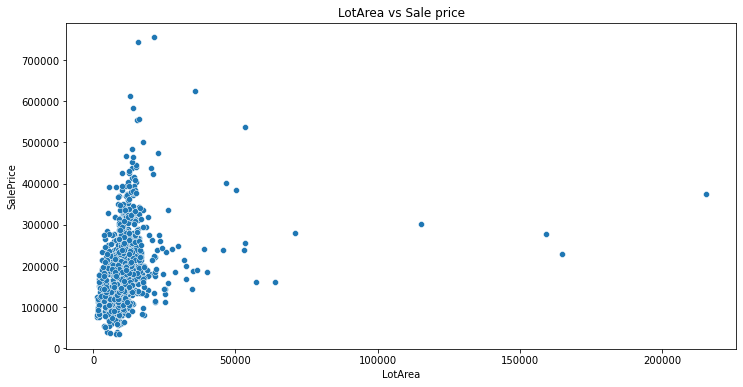

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='LotArea',y='SalePrice', data=house_data)
plt.title('LotArea vs Sale price');

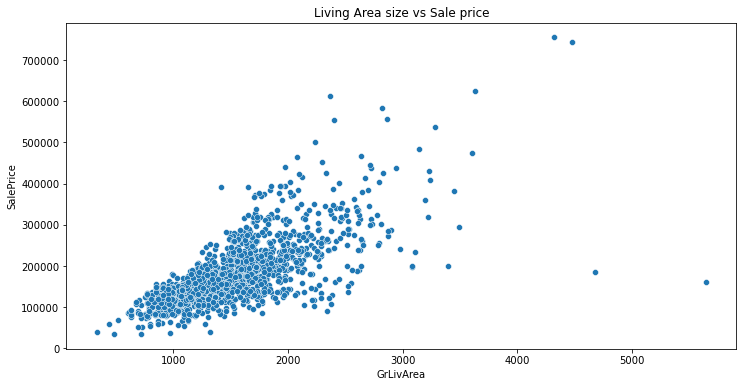

In [203]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='GrLivArea',y='SalePrice', data=house_data)
plt.title('Living Area size vs Sale price');

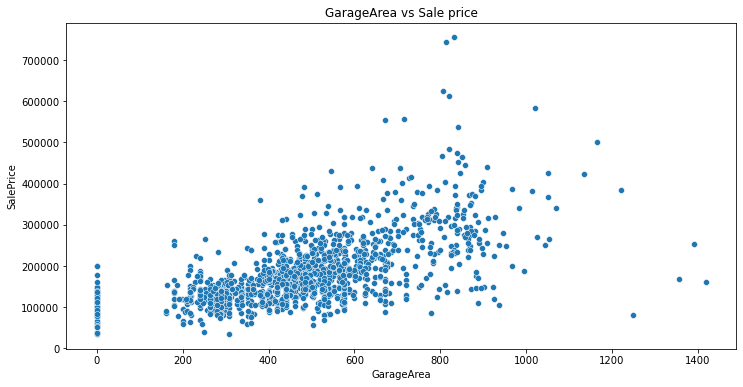

In [85]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='GarageArea',y='SalePrice', data=house_data)
plt.title('GarageArea vs Sale price');

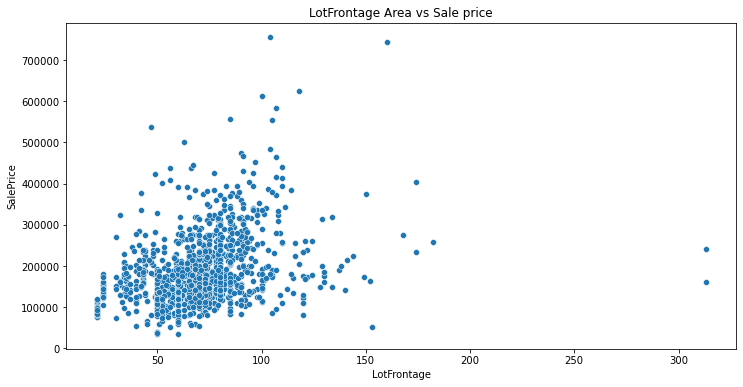

In [229]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='LotFrontage',y='SalePrice', data=house_data)
plt.title('LotFrontage Area vs Sale price');

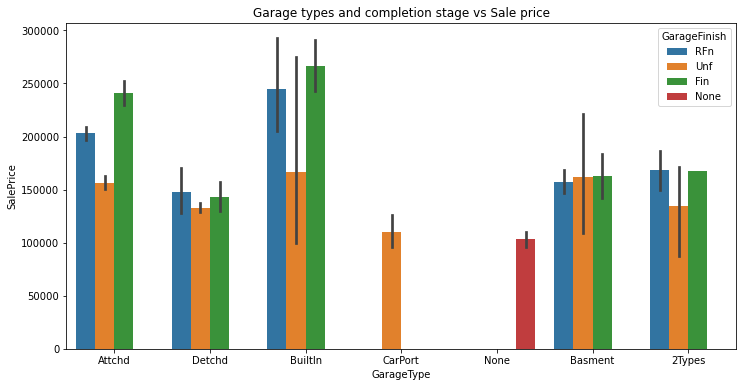

In [204]:
plt.figure(figsize=(12,6))
sns.barplot(x='GarageType',y='SalePrice', data=house_data, hue='GarageFinish')
plt.title('Garage types and completion stage vs Sale price');

Text(0.5, 1.0, 'Relationship between the Total number of rooms above ground vs Sale price')

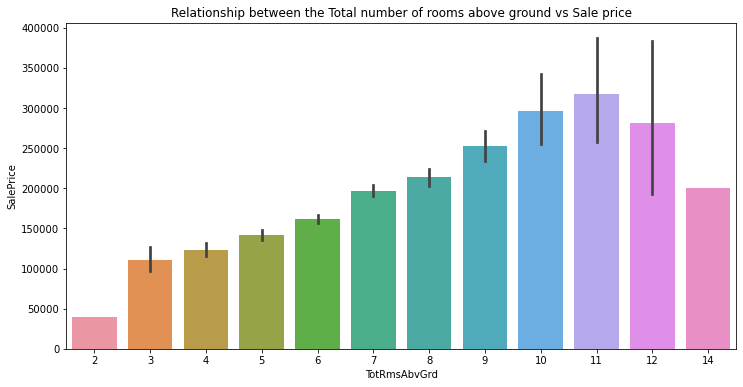

In [205]:
plt.figure(figsize=(12,6))
sns.barplot(x='TotRmsAbvGrd',y='SalePrice', data=house_data)
plt.title('Relationship between the Total number of rooms above ground vs Sale price')

Text(0.5, 1.0, 'Fireplace, vs Sale price')

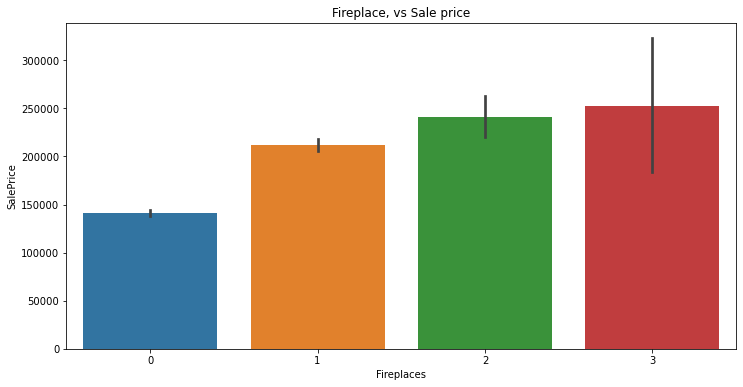

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x='Fireplaces',y='SalePrice', data=house_data)
plt.title('Fireplace, vs Sale price')

Text(0.5, 1.0, 'Fireplace and fireplace Quality vs Sale price')

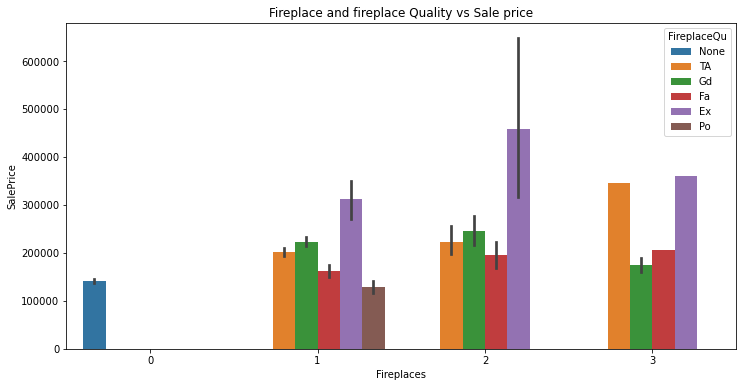

In [206]:
plt.figure(figsize=(12,6))
sns.barplot(x='Fireplaces',y='SalePrice', data=house_data,hue='FireplaceQu')
plt.title('Fireplace and fireplace Quality vs Sale price')

Text(0.5, 1.0, 'Relationship building type and Sale price')

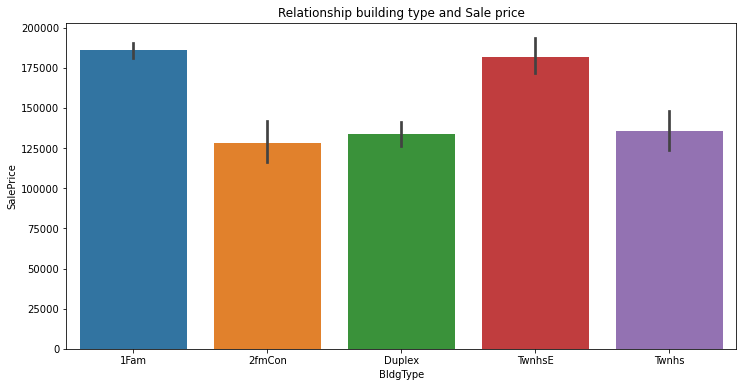

In [207]:
plt.figure(figsize=(12,6))
sns.barplot(x='BldgType',y='SalePrice', data=house_data)
plt.title('Relationship building type and Sale price')

Text(0.5, 1.0, 'Sale Type vs Sale price')

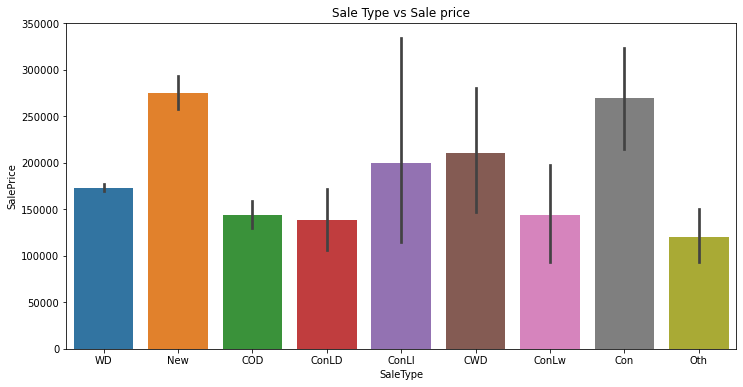

In [208]:
plt.figure(figsize=(12,6))
sns.barplot(x='SaleType',y='SalePrice', data=house_data)
plt.title('Sale Type vs Sale price')

Text(0.5, 1.0, 'Sale Condition vs Quality Sale price')

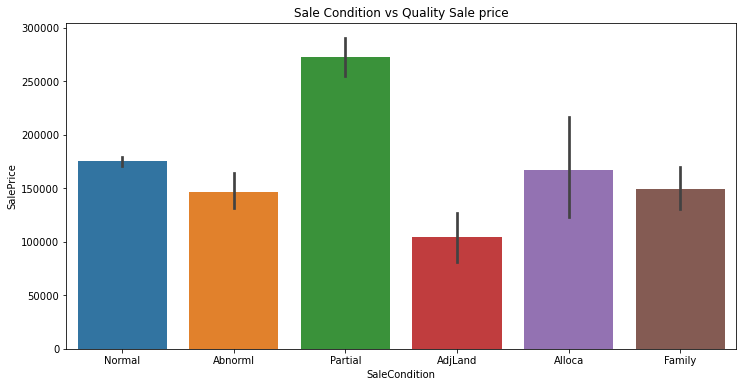

In [209]:
plt.figure(figsize=(12,6))
sns.barplot(x='SaleCondition',y='SalePrice', data=house_data)
plt.title('Sale Condition vs Quality Sale price')

Text(0.5, 1.0, 'Foundation vs Quality Sale price')

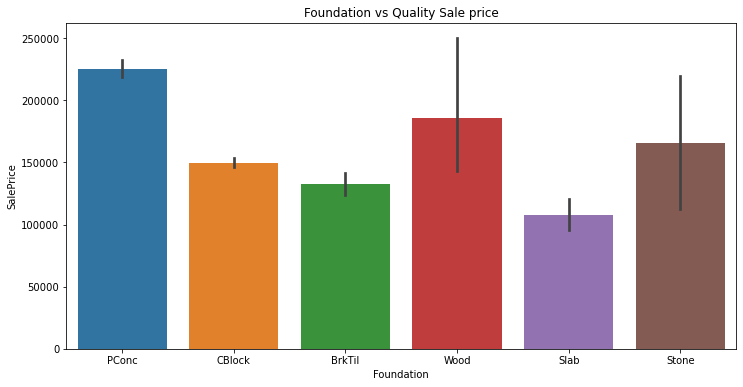

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(x='Foundation',y='SalePrice', data=house_data)
plt.title('Foundation vs Quality Sale price')

Text(0.5, 1.0, 'Changes in house price with the house remodel year')

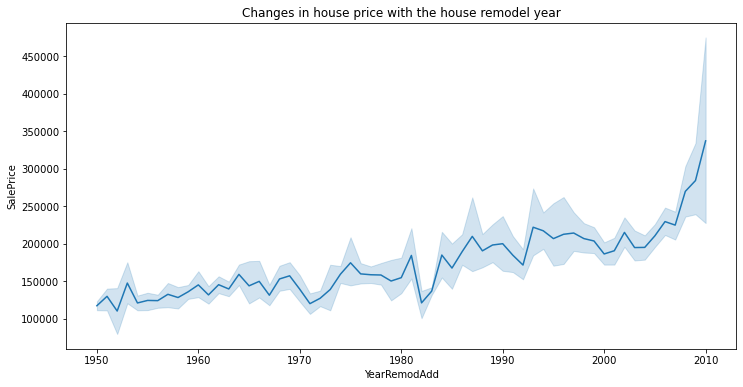

In [210]:
plt.figure(figsize=(12,6))
sns.lineplot(x='YearRemodAdd',y='SalePrice', data=house_data)
plt.title('Changes in house price with the house remodel year')

Text(0.5, 1.0, 'Number of house sold yearly')

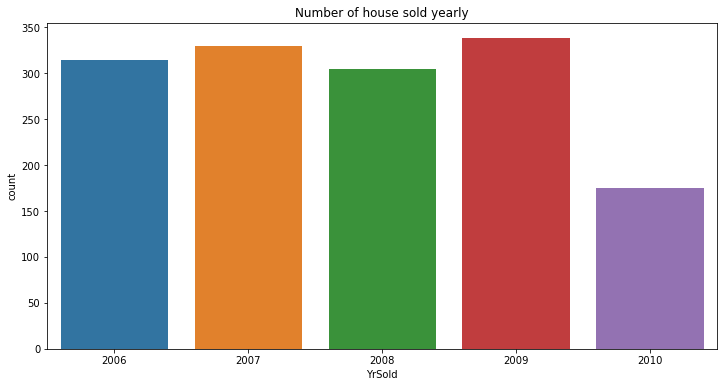

In [211]:
plt.figure(figsize=(12,6))
sns.countplot(x='YrSold', data=house_data)
plt.title('Number of house sold yearly')

Text(0.5, 1.0, 'Month Sold monthly house sales')

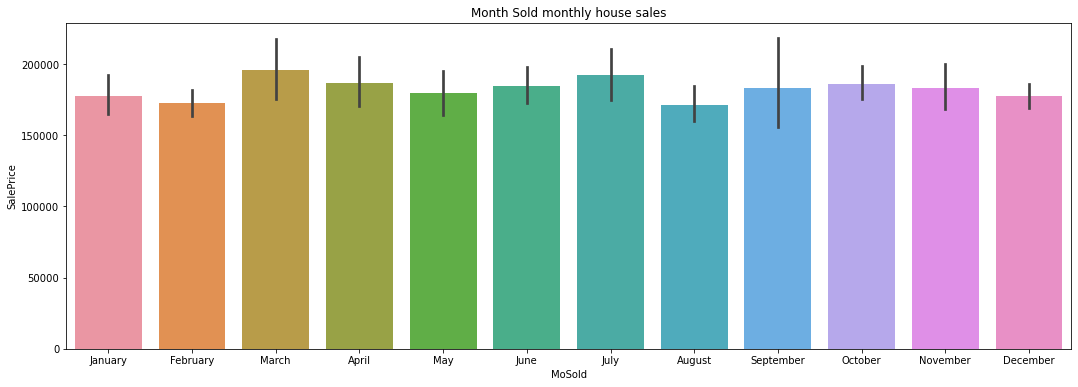

In [130]:
plt.figure(figsize=(18,6))
fig=sns.barplot(x='MoSold', y='SalePrice', data=house_data)
fig.set(xticklabels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                    'October', 'November', 'December'])
plt.title('Monthly house sales')

In [212]:
house_num_data_var=house_data[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                         'TotalBsmtSF','1stFlrSF','GrLivArea','2ndFlrSF','LowQualFinSF','TotRmsAbvGrd','GarageArea',
                         'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                         'MiscVal','SalePrice']]
corrmat=house_num_data_var.corr()

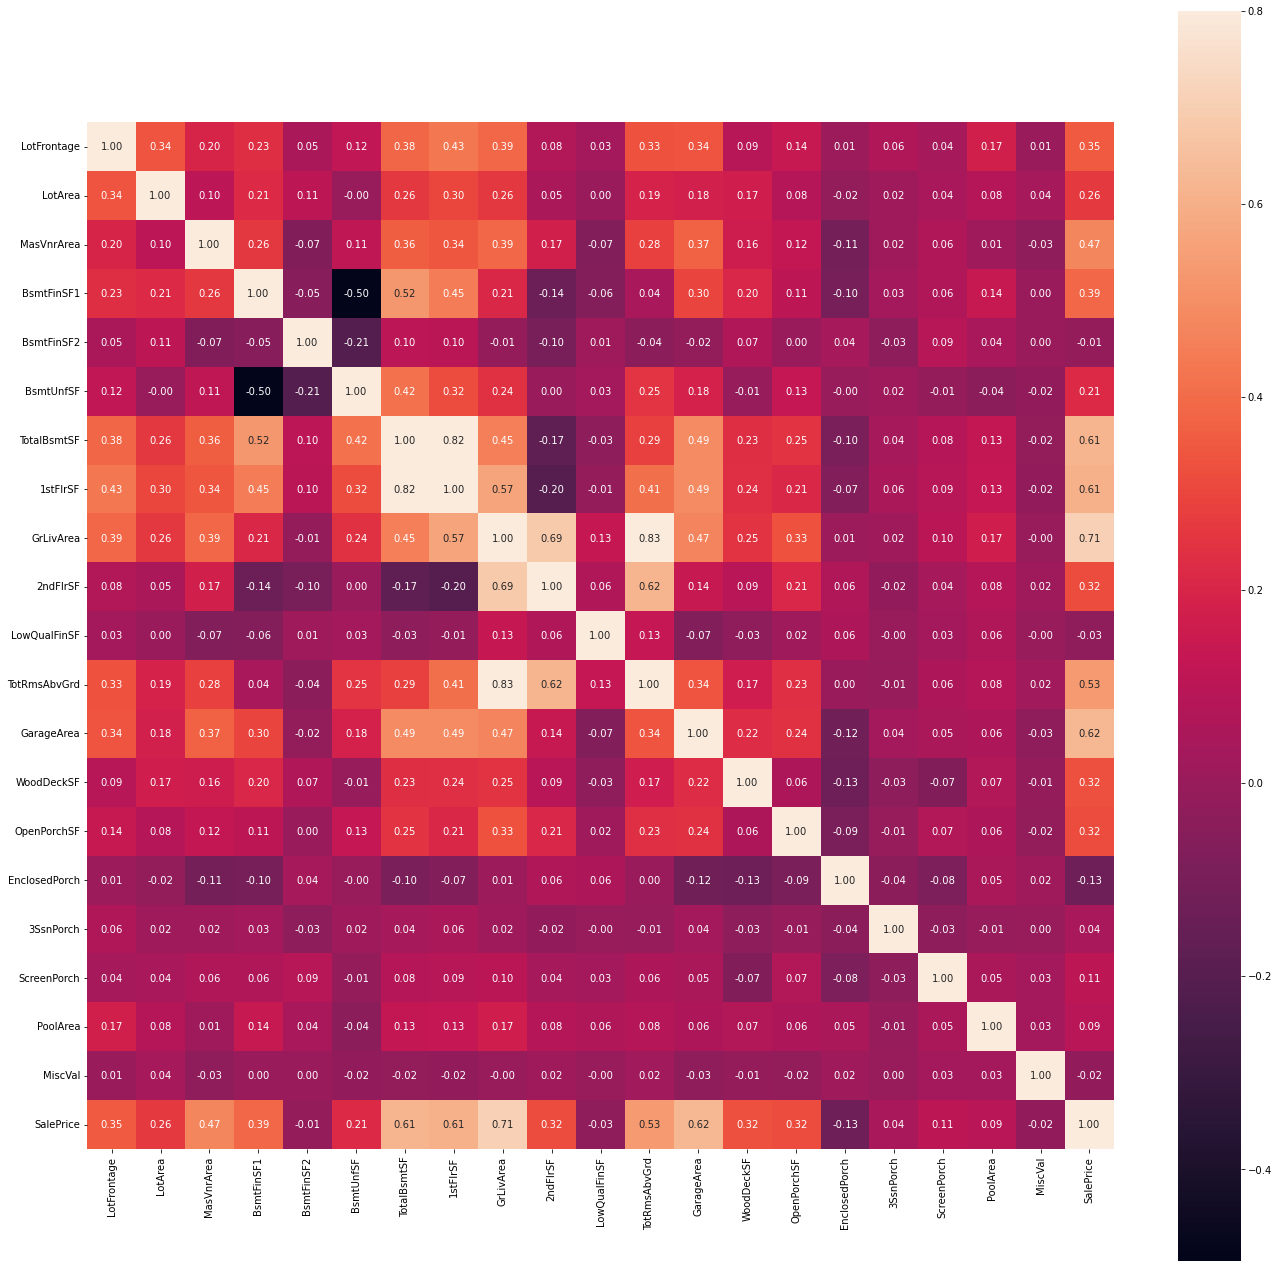

In [213]:
f, ax=plt.subplots(figsize=(23,23))
sns.heatmap(corrmat, 
            vmax=0.8,
            square=True,
            annot=True, 
            fmt='0.2f');

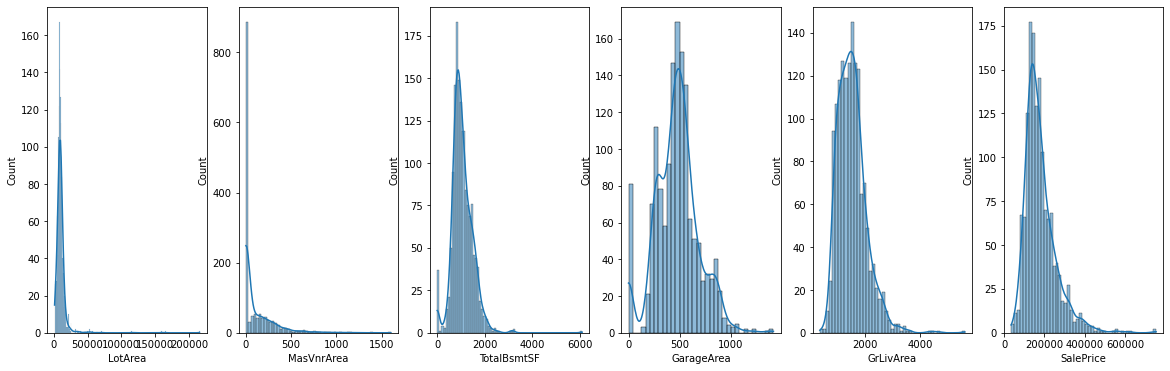

In [214]:
fig, axes=plt.subplots(1,6,sharey=False,figsize=(20,6))
sns.histplot(x='LotArea', data=house_data, kde=True, ax=axes[0])
sns.histplot(x='MasVnrArea', data=house_data, kde=True, ax=axes[1])
sns.histplot(x='TotalBsmtSF', data=house_data, kde=True, ax=axes[2])
sns.histplot(x='GarageArea', data=house_data, kde=True, ax=axes[3])
sns.histplot(x='GrLivArea', data=house_data, kde=True, ax=axes[4])
sns.histplot(x='SalePrice', data=house_data, kde=True, ax=axes[5])


plt.show()

#data are highly skewed to the right

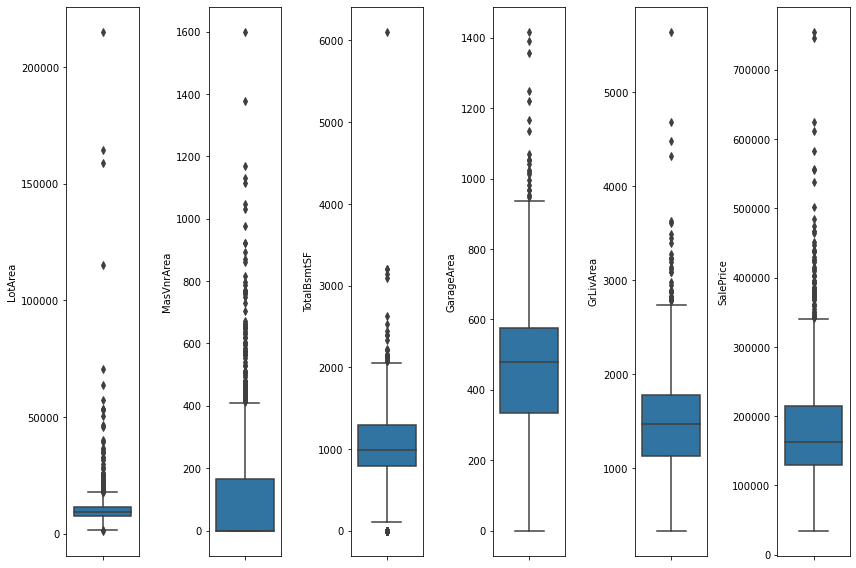

In [215]:
f,(ax1, ax2, ax3, ax4, ax5, ax6)=plt.subplots(1,6, figsize=(12,8))
sns.boxplot(y='LotArea', data=house_data,ax=ax1)
sns.boxplot(y='MasVnrArea', data=house_data, ax=ax2)
sns.boxplot(y='TotalBsmtSF', data=house_data,ax=ax3)
sns.boxplot(y='GarageArea', data=house_data,ax=ax4)
sns.boxplot(y='GrLivArea', data=house_data,ax=ax5)
sns.boxplot(y='SalePrice', data=house_data,ax=ax6)
plt.tight_layout()
plt.show()

#data has high outliers

In [126]:
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [14]:
col_to_cat=['MSSubClass','OverallQual','OverallCond']

for col in col_to_cat:
    house_data[col]= house_data[col].apply(str)

In [140]:
house_data.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [15]:
house_data.shape

(1460, 81)

In [154]:
cleaned_house_data=house_data.copy()

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn import datasets, linear_model, preprocessing

import category_encoders as ce
from category_encoders import *

from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, LassoCV,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression, SelectFromModel

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.simplefilter('ignore')

In [156]:
cleaned_house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [157]:
#lets drop highly imbalance columns and dates
x=cleaned_house_data.drop(columns=['Id','Street','Utilities','GarageYrBlt','Condition2','RoofMatl','Heating','Electrical',
                                   'Functional','MiscFeature','Alley','LandSlope','Condition1','ExterCond',
                                   'BsmtCond','GarageCond','PavedDrive','SalePrice','YearBuilt',
                                   'YearRemodAdd','PoolQC','MoSold','YrSold','SalePrice'])
y=cleaned_house_data['SalePrice']

In [158]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1022, 58), (438, 58), (1022,), (438,))

In [106]:
col_order_enc=['ExterQual','BsmtQual','BsmtExposure','BsmtFinType2','BsmtFinType1',
              'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual',
               'OverallQual','OverallCond']

In [159]:
encoder = OrdinalEncoder()
x_train[col_order_enc]=encoder.fit_transform(x_train[col_order_enc])

x_test[col_order_enc]=encoder.transform(x_test[col_order_enc])

In [160]:
col_bin_enc= ['MSSubClass','MSZoning','LotShape','LandContour','LotConfig',
             'Neighborhood','BldgType','HouseStyle','RoofStyle','Exterior1st',
             'Exterior2nd','MasVnrType','Foundation','CentralAir',
             'GarageType','Fence','SaleType','SaleCondition']


In [161]:
be=ce.BinaryEncoder(cols=col_bin_enc, return_df=True)

x_train=be.fit_transform(x_train)

x_test=be.transform(x_test)

In [162]:
x_train.head()

,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,LotConfig_0,LotConfig_1,LotConfig_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,BldgType_0,BldgType_1,BldgType_2,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,OverallQual,OverallCond,RoofStyle_0,RoofStyle_1,RoofStyle_2,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrArea,ExterQual,Foundation_0,Foundation_1,Foundation_2,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir_0,CentralAir_1,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType_0,GarageType_1,GarageType_2,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence_0,Fence_1,Fence_2,MiscVal,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2
376,0,0,0,1,0,0,1,57.0,8846,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0.0,1,0,0,1,1,1,1,298,1,0,572,870,1,0,1,914,0,0,914,0,0,1,0,2,1,1,5,0,1,0,0,1,1,2,576,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
250,0,0,1,0,0,0,1,55.0,5350,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,2,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0.0,2,0,1,0,2,2,2,0,1,0,728,728,1,0,1,1306,0,0,1306,0,0,1,0,3,1,2,6,0,1,0,1,0,2,0,0,2,263,0,0,0,0,0,0,1,0,450,0,0,0,1,0,0,1
228,0,0,1,1,0,0,1,70.0,8521,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0.0,2,0,1,0,2,2,3,842,1,0,70,912,2,0,1,912,0,0,912,0,0,1,0,3,1,1,5,1,2,0,0,1,1,1,336,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
40,0,0,1,1,0,0,1,84.0,8658,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,101.0,2,0,1,0,2,2,4,643,1,0,445,1088,1,0,1,1324,0,0,1324,0,0,2,0,3,1,1,6,1,3,0,1,1,3,2,440,1,0,138,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
428,0,0,1,1,0,0,1,64.0,6762,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,4,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,108.0,1,0,0,1,1,2,1,664,1,0,544,1208,1,0,1,1208,0,0,1208,1,0,2,0,2,1,3,6,0,1,0,1,1,3,2,628,1,105,54,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1


In [163]:
transformer=ColumnTransformer(transformers=[
    
   ('std_scalar', StandardScaler(),['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                    'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                                    'GrLivArea','BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath',
                                    'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                                    'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                                    '3SsnPorch','ScreenPorch','PoolArea','MiscVal']) 
    
    
  ],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('std_scalar', StandardScaler(),
                                 ['LotFrontage', 'LotArea', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'BsmtHalfBath', 'FullBath', 'HalfBath',
                                  'BedroomAbvGr', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                                  'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                                  'PoolArea', 'MiscVal'])])

In [164]:
transformed_x_train=pd.DataFrame(transformer.fit_transform(x_train),
                           columns=transformer.get_feature_names_out(),
                                index=x_train.index)
transformed_x_train.head(10)

,std_scalar__LotFrontage,std_scalar__LotArea,std_scalar__MasVnrArea,std_scalar__BsmtFinSF1,std_scalar__BsmtFinSF2,std_scalar__BsmtUnfSF,std_scalar__TotalBsmtSF,std_scalar__1stFlrSF,std_scalar__2ndFlrSF,std_scalar__LowQualFinSF,std_scalar__GrLivArea,std_scalar__BsmtFullBath,std_scalar__BsmtHalfBath,std_scalar__FullBath,std_scalar__HalfBath,std_scalar__BedroomAbvGr,std_scalar__KitchenAbvGr,std_scalar__TotRmsAbvGrd,std_scalar__Fireplaces,std_scalar__GarageCars,std_scalar__GarageArea,std_scalar__WoodDeckSF,std_scalar__OpenPorchSF,std_scalar__EnclosedPorch,std_scalar__3SsnPorch,std_scalar__ScreenPorch,std_scalar__PoolArea,std_scalar__MiscVal,remainder__MSSubClass_0,remainder__MSSubClass_1,remainder__MSSubClass_2,remainder__MSSubClass_3,remainder__MSZoning_0,remainder__MSZoning_1,remainder__MSZoning_2,remainder__LotShape_0,remainder__LotShape_1,remainder__LotShape_2,remainder__LandContour_0,remainder__LandContour_1,remainder__LandContour_2,remainder__LotConfig_0,remainder__LotConfig_1,remainder__LotConfig_2,remainder__Neighborhood_0,remainder__Neighborhood_1,remainder__Neighborhood_2,remainder__Neighborhood_3,remainder__Neighborhood_4,remainder__BldgType_0,remainder__BldgType_1,remainder__BldgType_2,remainder__HouseStyle_0,remainder__HouseStyle_1,remainder__HouseStyle_2,remainder__HouseStyle_3,remainder__OverallQual,remainder__OverallCond,remainder__RoofStyle_0,remainder__RoofStyle_1,remainder__RoofStyle_2,remainder__Exterior1st_0,remainder__Exterior1st_1,remainder__Exterior1st_2,remainder__Exterior1st_3,remainder__Exterior2nd_0,remainder__Exterior2nd_1,remainder__Exterior2nd_2,remainder__Exterior2nd_3,remainder__Exterior2nd_4,remainder__MasVnrType_0,remainder__MasVnrType_1,remainder__MasVnrType_2,remainder__ExterQual,remainder__Foundation_0,remainder__Foundation_1,remainder__Foundation_2,remainder__BsmtQual,remainder__BsmtExposure,remainder__BsmtFinType1,remainder__BsmtFinType2,remainder__HeatingQC,remainder__CentralAir_0,remainder__CentralAir_1,remainder__KitchenQual,remainder__FireplaceQu,remainder__GarageType_0,remainder__GarageType_1,remainder__GarageType_2,remainder__GarageFinish,remainder__GarageQual,remainder__Fence_0,remainder__Fence_1,remainder__Fence_2,remainder__SaleType_0,remainder__SaleType_1,remainder__SaleType_2,remainder__SaleType_3,remainder__SaleCondition_0,remainder__SaleCondition_1,remainder__SaleCondition_2
376,-0.566504,-0.150083,-0.570667,-0.301414,-0.28229,0.009986,-0.403595,-0.628924,-0.797828,-0.1294,-1.122539,-0.804392,-0.234034,-1.023067,-0.748512,-1.03986,-0.231535,-0.924643,-0.952789,0.333696,0.518931,-0.749421,-0.685547,-0.360803,-0.112837,-0.271032,-0.069193,-0.108754,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
250,-0.656982,-0.505027,-0.570667,-0.932224,-0.28229,0.361595,-0.714639,0.353300,-0.797828,-0.1294,-0.394941,-0.804392,-0.234034,-1.023067,-0.748512,0.14623,-0.231535,-0.319271,-0.952789,-2.330655,-2.190237,1.284957,-0.685547,-0.360803,-0.112837,-0.271032,-0.069193,1.343344,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
228,0.021601,-0.183080,-0.570667,0.850133,-0.28229,-1.121474,-0.311597,-0.633935,-0.797828,-0.1294,-1.126251,-0.804392,-0.234034,-1.023067,-0.748512,0.14623,-0.231535,-0.924643,0.615247,-0.998480,-0.609889,-0.749421,-0.685547,-0.360803,-0.112837,-0.271032,-0.069193,-0.108754,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,3.0,1.0,2.0,0.0,1.0

In [165]:
transformed_x_train.shape

(1022, 101)

In [168]:
model=LinearRegression()

pipeline=Pipeline(steps=[('transformer', transformer),
                         ('model', model)])

pipeline.fit(x_train,y_train)
print('Training Score:', pipeline.score(x_train,y_train))

y_pred=pipeline.predict(x_test)

print('Testing Score r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred, squared=False))

Training Score: 0.8293392011633385
Testing Score r2: 0.8214158363550854
MAE: 21911.198630136987
RMSE: 32012.45669466581


In [180]:
#Random Forest Regressor with LinearSVR feature selector
feature_selection=SelectFromModel(LinearSVR())
model=RandomForestRegressor()

pipeline=Pipeline(steps=[('transformer', transformer),
                        ('feature_selection', feature_selection),
                        ('model', model)])

pipeline.fit(x_train,y_train)
print('Training Score:', pipeline.score(x_train,y_train))

y_pred=pipeline.predict(x_test)

print('Testing Score r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred, squared=False))

Training Score: 0.9614349432057331
Testing Score r2: 0.7868145454284872
MAE: 23656.905173950858
RMSE: 34976.497433137156


In [182]:
model=Ridge()

pipeline=Pipeline(steps=[('transformer', transformer),
                         ('model', model)])

pipeline.fit(x_train,y_train)
print('Training Score:', pipeline.score(x_train,y_train))

y_pred=pipeline.predict(x_test)

print('Testing Score r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred, squared=False))

Training Score: 0.8292473536823087
Testing Score r2: 0.8228820606616771
MAE: 21813.634929469645
RMSE: 31880.770376646644


In [183]:
model=DecisionTreeRegressor()

pipeline=Pipeline(steps=[('transformer', transformer),
                         ('model', model)])

pipeline.fit(x_train,y_train)
print('Training Score:', pipeline.score(x_train,y_train))

y_pred=pipeline.predict(x_test)

print('Testing Score r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred, squared=False))

Training Score: 0.9999946014599126
Testing Score r2: 0.6819492416472979
MAE: 26960.62785388128
RMSE: 42721.426884930646


In [184]:
model=ExtraTreeRegressor()

pipeline=Pipeline(steps=[('transformer', transformer),
                         ('model', model)])

pipeline.fit(x_train,y_train)
print('Training Score:', pipeline.score(x_train,y_train))

y_pred=pipeline.predict(x_test)

print('Testing Score r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred, squared=False))

Training Score: 0.9999946014599126
Testing Score r2: 0.5835140973380455
MAE: 30897.65068493151
RMSE: 48887.4837726255


In [185]:
model=RandomForestRegressor()

pipeline=Pipeline(steps=[('transformer', transformer),
                         ('model', model)])

pipeline.fit(x_train,y_train)
print('Training Score:', pipeline.score(x_train,y_train))

y_pred=pipeline.predict(x_test)

print('Testing Score r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred, squared=False))

Training Score: 0.976804349349443
Testing Score r2: 0.8636546181366884
MAE: 17392.6247564688
RMSE: 27971.628278720444


In [186]:
#RandomForestRegressor shouwed to have performed better #let perform features select to improve result
def train_model_feature_selection(model_fn):
    mse_scr, mae_scr,r_square_scr=([] for lst in range (0,3))
    
    for i in range (1, len(transformed_x_train.columns)+1,1):
        feature_selection=SelectKBest(score_func=mutual_info_regression, k=i)
        
        model=model_fn()
        
        pipeline=Pipeline(steps=[('transformer', transformer),
                        ('feature_selection', feature_selection),
                        ('model', model)])

        pipeline.fit(x_train,y_train)
        
        y_pred=pipeline.predict(x_test)

        print('MSE (k={}):{}'.format(i, mean_squared_error(y_test,y_pred, squared=False)))
        mse_scr.append(mean_squared_error(y_test,y_pred))
        
        print('MAE (k={}):{}'.format(i, mean_absolute_error(y_test,y_pred)))
        mae_scr.append(mean_absolute_error(y_test,y_pred))
    
        print('R-square (k={}):{}'.format(i, r2_score(y_test,y_pred)),end='\n{}\n'. format(50*'_'))
        r_square_scr.append(r2_score(y_test,y_pred))
                                                
        
    return mse_scr, mae_scr,r_square_scr

In [187]:
mse_scr, mae_scr,r_square_scr=train_model_feature_selection(RandomForestRegressor)

MSE (k=1):42562.18042337081
MAE (k=1):30589.424240319302
R-square (k=1):0.6843159257259046
__________________________________________________
MSE (k=2):39563.8214562304
MAE (k=2):28953.805772326483
R-square (k=2):0.7272269857366048
__________________________________________________
MSE (k=3):36248.21316541562
MAE (k=3):25176.01514389973
R-square (k=3):0.7710302328221514
__________________________________________________
MSE (k=4):35962.443891204144
MAE (k=4):25062.66205032157
R-square (k=4):0.7746262500591613
__________________________________________________
MSE (k=5):32885.20894569373
MAE (k=5):21669.212482883686
R-square (k=5):0.8115456582505289
__________________________________________________
MSE (k=6):31913.286804744283
MAE (k=6):21055.08136331325
R-square (k=6):0.8225205775664953
__________________________________________________
MSE (k=7):32061.25740455784
MAE (k=7):20899.952591752488
R-square (k=7):0.8208709436735413
__________________________________________________
MSE (k=8

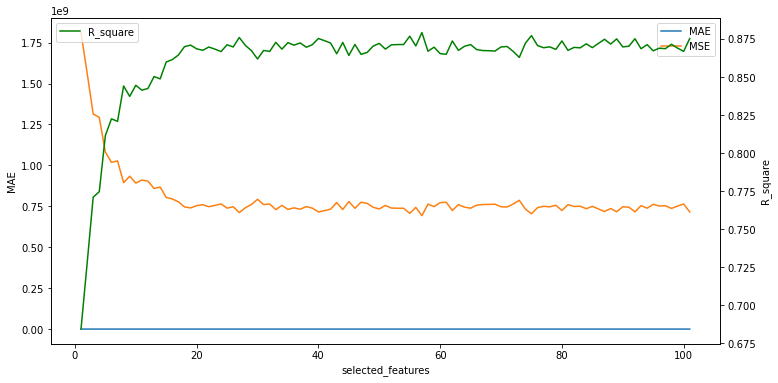

In [188]:
scores=pd.DataFrame({'selected_features': range(1, len(transformed_x_train.columns)+1),
                                          'MAE':mae_scr,
                                           'MSE':mse_scr,
                                            'R_square':r_square_scr})
f, ax1=plt.subplots(figsize=(12,6))
ax2=ax1.twinx()
                    
sns.lineplot(x='selected_features', y='MAE', label='MAE', data =scores, ax=ax1)
sns.lineplot(x='selected_features', y='MSE', label='MSE', data =scores, ax=ax1)
sns.lineplot(x='selected_features', y='R_square', label='R_square', color='green', data =scores, ax=ax2)

           
             
plt.show()

In [190]:
#lets select 20 features
feature_selection=SelectKBest(score_func=mutual_info_regression, k=20)
model=RandomForestRegressor()

pipeline=Pipeline(steps=[('transformer', transformer),
                        ('feature_selection', feature_selection),
                        ('model', model)])

pipeline.fit(x_train,y_train)
print('Training Score:', pipeline.score(x_train,y_train))

y_pred=pipeline.predict(x_test)

print('Testing Score r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('RMSE:', mean_squared_error(y_test,y_pred, squared=False))

Training Score: 0.9779919190312857
Testing Score r2: 0.8710226410841849
MAE: 17496.777575559907
RMSE: 27205.34712733071


In [191]:
pred_vs_actual=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
pred_vs_actual.head(10)

,Predicted,Actual
147,226146.50,222500
676,185921.75,87000
1304,149077.50,130000
1372,243314.90,274300
1427,146978.34,140000
1127,263226.74,259000
35,318334.74,309000
954,119170.09,127500
1296,147443.00,155000
613,115034.25,147000


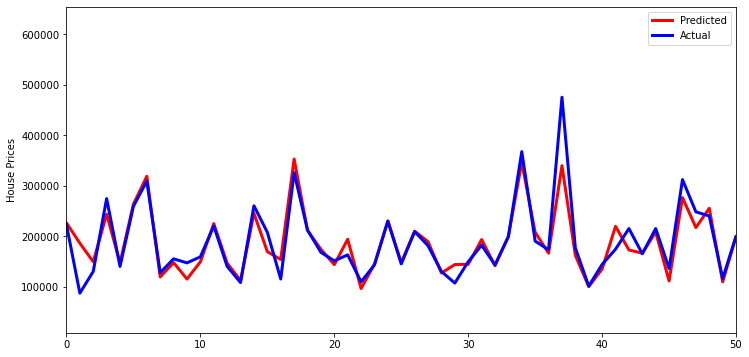

In [192]:
#plot predict vs actual and limit it to first 50
plt.figure(figsize=(12,6))
plt.plot(pipeline.predict(x_test), label='Predicted', linewidth=3,color='red')
plt.plot(y_test.values, label='Actual', linewidth=3, color='blue')
plt.xlim([0,50])
plt.ylabel('House Prices')
plt.legend()
plt.show()

In [195]:
mask = pipeline['feature_selection'].get_support()
mask

array([ True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [196]:
feature_names=transformer.get_feature_names_out()
selected_features=[]
for selected, feature in zip(mask, feature_names):
    if selected:
        selected_features.append(feature)
selected_features

['std_scalar__LotFrontage',
 'std_scalar__LotArea',
 'std_scalar__BsmtFinSF1',
 'std_scalar__TotalBsmtSF',
 'std_scalar__1stFlrSF',
 'std_scalar__2ndFlrSF',
 'std_scalar__GrLivArea',
 'std_scalar__FullBath',
 'std_scalar__TotRmsAbvGrd',
 'std_scalar__GarageCars',
 'std_scalar__GarageArea',
 'remainder__OverallQual',
 'remainder__ExterQual',
 'remainder__Foundation_1',
 'remainder__BsmtQual',
 'remainder__BsmtFinType1',
 'remainder__HeatingQC',
 'remainder__KitchenQual',
 'remainder__FireplaceQu',
 'remainder__GarageFinish']

In [197]:

selected_feature_df=pd.DataFrame({'feature':selected_features,
                                 'score':pipeline['feature_selection'].scores_[mask]})
selected_feature_df.sort_values(by='score', ascending=False, ignore_index=True)

,feature,score
0,remainder__OverallQual,0.576769
1,std_scalar__GrLivArea,0.490007
2,std_scalar__GarageArea,0.356020
3,std_scalar__GarageCars,0.337003
4,std_scalar__TotalBsmtSF,0.335770
5,remainder__BsmtQual,0.329403
6,remainder__KitchenQual,0.320253
7,remainder__ExterQual,0.315513
8,std_scalar__1stFlrSF,0.301143
9,std_scalar__FullBath,0.263600


In [ ]:
#Let Use Keras

In [238]:
x_train_keras=x_train.copy()
x_test_keras=x_test.copy()

In [239]:
col_scale= ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'GrLivArea','BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath',
             'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
             'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
             '3SsnPorch','ScreenPorch','PoolArea','MiscVal']


In [240]:
enc_scale = StandardScaler()
x_train_keras[col_scale]=enc_scale.fit_transform(x_train_keras[col_scale])

x_test_keras[col_scale]=enc_scale.transform(x_test_keras[col_scale])

In [301]:
x_train_keras.shape,y_train.shape, x_test_keras.shape, y_test.shape 

((1022, 101), (1022,), (438, 101), (438,))

In [288]:
import tensorflow as tf
from tensorflow import keras

In [289]:
def buildmodel():
    model=keras.Sequential([
        keras.layers.Dense(30,
                         activation=tf.nn.relu,
                         input_shape=(x_train_keras.shape[1],)),
        
        keras.layers.Dense(30,
                          activation=tf.nn.relu),
        
        keras.layers.Dense(1)
        ])
    
    optimizer=tf.optimizers.Adam(0.01)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    
    return model

In [290]:
model=buildmodel()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                3060      
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,021
Trainable params: 4,021
Non-trainable params: 0
_________________________________________________________________


In [291]:
history=model.fit(x_train_keras,
                 y_train,
                 validation_split=0.2,
                 epochs=100,
                 verbose=0)

In [292]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('mean Abs Error')
    
    plt.plot(history.epoch,
            np.array(history.history['mae']),
            label='Train Loss')
    plt.plot(history.epoch,
            np.array(history.history['val_mae']),
            label='val Loss')
    plt.legend()
    plt.show()

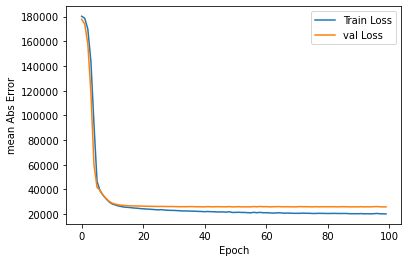

In [293]:
plot_history(history)

In [294]:
loss, mae=model.evaluate(x_test_keras,
                        y_test,
                        verbose=0)

In [295]:
print('Testing Mean Abs Error:${:7.2f}'.format(mae))
print('Test loss:{:7.2f}'.format(loss))

Testing Mean Abs Error:$22279.57
Test loss:1055524480.00


In [296]:
train_pred_model=model.predict(x_train_keras)

32/32 [==============================] - 0s 2ms/step


In [297]:
y_pred=model.predict(x_test_keras).flatten()

14/14 [==============================] - 0s 1ms/step


In [298]:
print('Training Score: %.2f'%r2_score(y_train,train_pred_model))

Training Score: 0.77


In [299]:
print('Test Score: %.2f'%r2_score(y_test,y_pred))

Test Score: 0.82


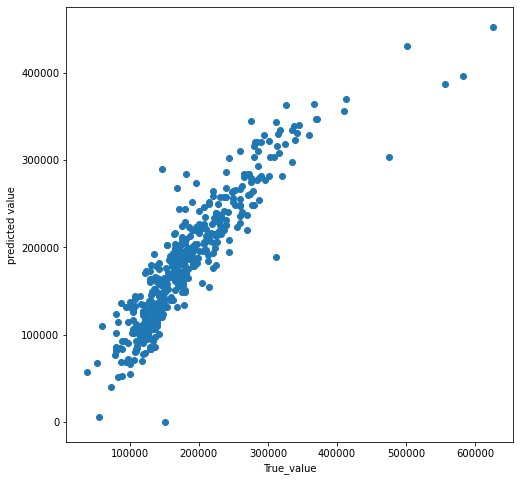

In [306]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred)
plt.xlabel('True_value')
plt.ylabel('predicted value');

In [ ]:
#RandomForestRegressor see appear to perform better